In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/california_housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
len(train_data), len(test_data)

(16512, 4128)

In [6]:
X_train = train_data.drop(columns=["MedHouseVal"]).values
y_train = train_data["MedHouseVal"].values
X_test = test_data.drop(columns=["MedHouseVal"]).values
y_test = test_data["MedHouseVal"].values
X_train.shape, y_train.shape

((16512, 8), (16512,))

In [7]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
X_train = std_scl.fit_transform(X_train)
X_test = std_scl.transform(X_test)
X_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]], shape=(16512, 8))

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [9]:
lr_model.score(X_train, y_train), lr_model.score(X_test, y_test)

(0.6125511913966952, 0.575787706032451)

In [10]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.linspace(0.01, 10, 100))
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]))

In [11]:
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.6125508767959973, 0.5758471784527517)

In [12]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas=np.linspace(0.001, 10, 100), random_state=42)
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+00, 2.829e+00, 2.930e+00,
       3.031e+00, 3.132e+00, 3.233e+0...
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01]),
        random_state=42)

In [13]:
lassocv.score(X_train, y_train), lassocv.score(X_test, y_test)

(0.6125094085909122, 0.576856256870568)

In [14]:
lassocv.alpha_

np.float64(0.001)

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, random_state=42)

In [16]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.6084735081636228, 0.5816154300698727)

In [17]:
lasso.coef_

array([ 0.80095744,  0.12708701, -0.16275931,  0.20620745, -0.        ,
       -0.03060176, -0.79011254, -0.75567379])

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(lasso, X_train, y_train, cv=10)

array([0.64307007, 0.58804386, 0.60870611, 0.6076259 , 0.5881528 ,
       0.62689176, 0.62846916, 0.58565237, 0.60591626, 0.59277717])

In [19]:
from sklearn.linear_model import ElasticNet

train_scores = []
test_scores = []

for alpha in np.linspace(0.0001, 1, 100):
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)
    elastic_net.fit(X_train, y_train)
    train_scores.append(elastic_net.score(X_train, y_train))
    test_scores.append(elastic_net.score(X_test, y_test))

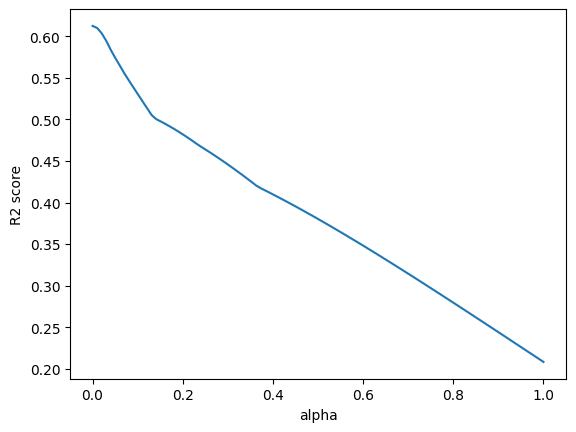

In [20]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0.0001, 1, 100), train_scores)
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()

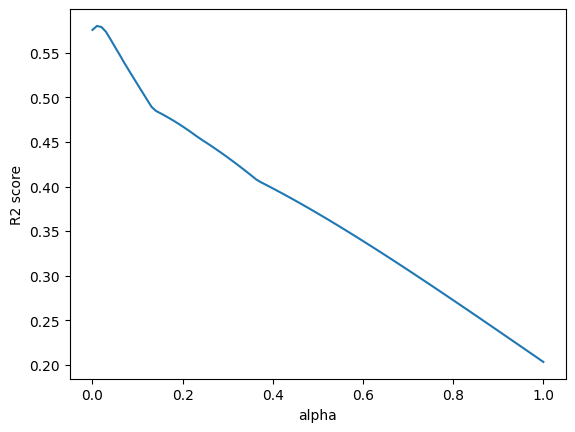

In [21]:
plt.plot(np.linspace(0.0001, 1, 100), test_scores)
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()